# Atividade 2.2



### Importanto bibliotecas e acessando a Base de Dados

! Base de Dados do dia: 11/10/2021

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Abrindo o DataSet
#### Modificações Iniciais da Base

data = pd.read_csv('Manaus.csv',sep=';', header=None, skiprows=0)

C:\Users\sabrj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,26,27,28,29,30,31,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.columns = data.iloc[0]

In [4]:
data = data.drop(0)

In [5]:
data.head()

,_dt_evolucao,_dt_notificacao,_dt_sintomas,_classificacao,_conclusao,_origem,_comorb_cardio,_comorb_cromossomica,_comorb_diabetes,_comorb_hemato,...,_sintoma_tosse,_sintoma_outros,_srag,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_distrito,_taxa
1,25/01/2020 00:00,03/01/2020 00:00,01/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,TARUMA,TARUMÃ,OESTE,"0,243042897"
2,03/01/2020 00:00,03/01/2020 00:00,01/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,Influenza B,NaN,NaN,NaN,TARUMA-ACU,TARUMÃ-AÇÚ,OESTE,"0,684931507"
3,05/01/2020 00:00,03/01/2020 00:00,03/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,JORGE TEIXEIRA,JORGE TEIXEIRA,LESTE,"0,073137374"
4,16/01/2020 00:00,08/01/2020 00:00,04/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,FLORES,FLORES,SUL,"0,198306463"
5,11/01/2020 00:00,08/01/2020 00:00,05/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,...,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,CIDADE DE DEUS,CIDADE DE DEUS,NORTE,"0,117699678"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243984 entries, 1 to 243984
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   _dt_evolucao          119011 non-null  object
 1   _dt_notificacao       243913 non-null  object
 2   _dt_sintomas          235760 non-null  object
 3   _classificacao        243984 non-null  object
 4   _conclusao            180928 non-null  object
 5   _origem               243984 non-null  object
 6   _comorb_cardio        13686 non-null   object
 7   _comorb_cromossomica  527 non-null     object
 8   _comorb_diabetes      9981 non-null    object
 9   _comorb_hemato        175 non-null     object
 10  _comorb_hepatica      135 non-null     object
 11  _comorb_imuno         1805 non-null    object
 12  _comorb_neurologica   542 non-null     object
 13  _comorb_obessidade    573 non-null     object
 14  _comorb_renal         1098 non-null    object
 15  _comorb_respirato

#### Removendo Casos que não são confirmados

In [7]:
x = data.loc[data['_classificacao']!='Confirmado']

x.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            243970, 243972, 243973, 243975, 243976, 243977, 243979, 243981,
            243982, 243984],
           dtype='int64', length=163564)

In [8]:
data = data.drop(x.index)

In [9]:
data['_classificacao'].value_counts()

Confirmado    80420
Name: _classificacao, dtype: int64

In [10]:
data = data.drop(columns=['_comorb_cardio','_comorb_cromossomica','_comorb_diabetes','_comorb_hemato','_comorb_hepatica','_comorb_imuno','_comorb_neurologica','_comorb_obessidade','_comorb_renal','_comorb_respiratoria',
'_sintoma_dispneia','_sintoma_febre','_sintoma_garganta','_sintoma_tosse','_sintoma_outros','_etnia','_evolução','_profiss_saude','_dt_evolucao','_dt_sintomas','_gestante','_raca'])

In [11]:
data.head()

,_dt_notificacao,_classificacao,_conclusao,_origem,_criterio,_idade,_faixa etária,_se_notificacao,_sexo,_srag,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_distrito,_taxa
131,23/02/2020 00:00,Confirmado,Recuperado,"SIVEP, GAL",Laboratorial,12,10a - 14a,9,F,SRAG não especificado,NaN,NaN,1,MAUAZINHO,MAUAZINHO,LESTE,"0,35040998"
145,28/02/2020 00:00,Confirmado,Recuperado,"SIVEP, GAL",Laboratorial,39,30a - 39a,9,F,Vírus Sincicial Respiratório,NaN,NaN,1,NOVO ALEIXO,NOVO ALEIXO,NORTE,"0,085452557"
154,02/03/2020 00:00,Confirmado,Recuperado,"SIVEP, eSUS VE,",Laboratorial,2,1a - 4a,10,F,SRAG não especificado,1,NaN,NaN,PRACA 14 DE JANEIRO,PRAÇA 14 DE JANEIRO,SUL,"0,861920359"
159,02/03/2020 00:00,Confirmado,Recuperado,"SIVEP, eSUS VE,",Laboratorial,71,70a - 79a,10,F,SRAG não especificado,2,NaN,NaN,FLORES,FLORES,SUL,"0,198306463"
197,11/03/2020 00:00,Confirmado,Recuperado,"SIVEP, GAL",Clínico,46,40a - 49a,11,F,SRAG não especificado,NaN,NaN,2,CIDADE NOVA,CIDADE NOVA,NORTE,"0,068152389"


In [12]:
#data.dropna(subset=['_dt_notificacao','_classificacao','_conclusao','_origem','_criterio','_idade','_faixa etária','_se_notificacao','_sexo','_srag','_teste_anticorpo','_teste_antigeno','_teste_pcr','_bairro','_bairro_mapa','_distrito','_taxa'],inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80420 entries, 131 to 243983
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _dt_notificacao   80395 non-null  object
 1   _classificacao    80420 non-null  object
 2   _conclusao        42774 non-null  object
 3   _origem           80420 non-null  object
 4   _criterio         8842 non-null   object
 5   _idade            80395 non-null  object
 6   _faixa etária     80395 non-null  object
 7   _se_notificacao   80395 non-null  object
 8   _sexo             80301 non-null  object
 9   _srag             9095 non-null   object
 10  _teste_anticorpo  52177 non-null  object
 11  _teste_antigeno   8342 non-null   object
 12  _teste_pcr        23308 non-null  object
 13  _bairro           79649 non-null  object
 14  _bairro_mapa      76699 non-null  object
 15  _distrito         76699 non-null  object
 16  _taxa             76699 non-null  object
dtypes: object

###### REMOVENDO LINHAS SEM BAIRROS IDENTIFICADOS 

In [14]:
nan_value = float("NaN")
data['_bairro'].replace("", nan_value, inplace=True)
data['_bairro'].isnull()

131       False
145       False
154       False
159       False
197       False
          ...  
243971     True
243974    False
243978    False
243980    False
243983    False
Name: _bairro, Length: 80420, dtype: bool

In [15]:
data.dropna(subset = ["_bairro"], inplace=True)
bairros = data['_bairro'].value_counts()
bairros

CIDADE NOVA            4767
FLORES                 3007
SAO JOSE OPERARIO      2637
NOVO ALEIXO            2366
ALVORADA               2314
                       ... 
SANTANA DE BARRA          1
PARQUE X DE NOVEMBR       1
CJ CIDADE NOVA            1
SAO  GERALDO              1
CIDADE NOVA 0I            1
Name: _bairro, Length: 2629, dtype: int64

In [16]:
nan_value = float("NaN")
data['_sexo'].replace("", nan_value, inplace=True)
data['_sexo'].isnull()

131       False
145       False
154       False
159       False
197       False
          ...  
243924    False
243974    False
243978    False
243980    False
243983    False
Name: _sexo, Length: 79649, dtype: bool

In [17]:
data.dropna(subset = ["_sexo"], inplace=True)
data['_sexo'].value_counts()

F    43805
M    35725
Name: _sexo, dtype: int64

In [18]:
nan_value = float("NaN")
data['_idade'].replace("", nan_value, inplace=True)
data['_idade'].isnull()

131       False
145       False
154       False
159       False
197       False
          ...  
243924    False
243974    False
243978    False
243980    False
243983    False
Name: _idade, Length: 79530, dtype: bool

In [19]:
data.dropna(subset = ["_idade"], inplace=True)
data['_idade'].value_counts()

38.0     2041
40.0     1986
41.0     1934
37.0     1931
39.0     1931
         ... 
351.0       1
360.0       1
102         1
101         1
130.0       1
Name: _idade, Length: 219, dtype: int64

In [20]:
'''nan_value = float("NaN")
data['_conclusao'].replace("", nan_value, inplace=True)
data['_conclusao'].isnull()
data.dropna(subset = ['_conclusao'], inplace=True)'''

'nan_value = float("NaN")\ndata[\'_conclusao\'].replace("", nan_value, inplace=True)\ndata[\'_conclusao\'].isnull()\ndata.dropna(subset = [\'_conclusao\'], inplace=True)'

### Atividade 2.2.1 Ordem com 10 Bairros com mais casos confirmados

In [21]:
outro_bairros=bairros[11:].sum()
bairros

CIDADE NOVA            4767
FLORES                 3007
SAO JOSE OPERARIO      2637
NOVO ALEIXO            2366
ALVORADA               2314
                       ... 
SANTANA DE BARRA          1
PARQUE X DE NOVEMBR       1
CJ CIDADE NOVA            1
SAO  GERALDO              1
CIDADE NOVA 0I            1
Name: _bairro, Length: 2629, dtype: int64

In [22]:
locais = bairros[0:10].to_frame()

In [23]:
locais.loc['Outros'] = [outro_bairros]

In [24]:
locais

,_bairro
CIDADE NOVA,4767
FLORES,3007
SAO JOSE OPERARIO,2637
NOVO ALEIXO,2366
ALVORADA,2314
JORGE TEIXEIRA,2294
CENTRO,2210
COMPENSA,2200
COROADO,2067
ALEIXO,2007


In [25]:
n_casos = locais['_bairro'].values.tolist()

In [26]:
nome_locais = locais.index.tolist()

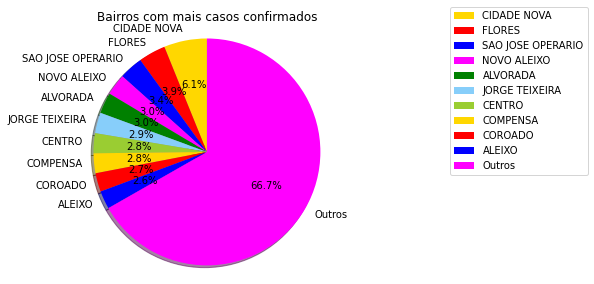

In [27]:

cores=['gold', 'red', 'blue', 'magenta', 'green','lightskyblue', 'yellowgreen']

# Atribuindo um título ao gráfico
plt.title('Bairros com mais casos confirmados')

plt.pie(n_casos, labels=nome_locais, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

#Adiciona Legenda
plt.legend(nome_locais, bbox_to_anchor=(1.3, 1.1))

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()

plt.show()

### 2.2.1 - Distribuição dos 10 bairros com mais casos confirmados, incluindo demais bairros

## ----------------------------------------------------------------------------------------------------------
## Atividade 2.2.2

In [28]:
data['_sexo'].value_counts()

F    43798
M    35707
Name: _sexo, dtype: int64

In [29]:
data['_sexo']

131       F
145       F
154       F
159       F
197       F
         ..
243924    M
243974    M
243978    F
243980    F
243983    F
Name: _sexo, Length: 79505, dtype: object

In [30]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79505 entries, 131 to 243983
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _dt_notificacao   79505 non-null  object
 1   _classificacao    79505 non-null  object
 2   _conclusao        42685 non-null  object
 3   _origem           79505 non-null  object
 4   _criterio         8823 non-null   object
 5   _idade            79505 non-null  object
 6   _faixa etária     79505 non-null  object
 7   _se_notificacao   79505 non-null  object
 8   _sexo             79505 non-null  object
 9   _srag             9074 non-null   object
 10  _teste_anticorpo  51969 non-null  object
 11  _teste_antigeno   8331 non-null   object
 12  _teste_pcr        22621 non-null  object
 13  _bairro           79505 non-null  object
 14  _bairro_mapa      76559 non-null  object
 15  _distrito         76559 non-null  object
 16  _taxa             76559 non-null  object
dtypes: object

        Modificamos o Dtpye da Coluna '_idade', de 'objet' para 'float', para aplicarmos o BoxPlot

In [31]:
data['_idade'] = data['_idade'].astype(float, errors = 'raise')

<AxesSubplot:title={'center':'_idade'}, xlabel='_sexo'>

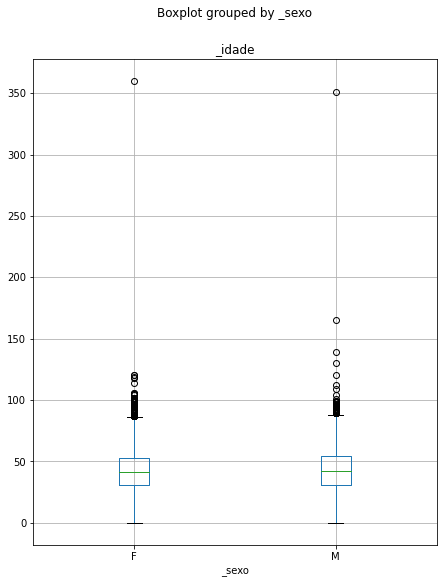

In [32]:
data.boxplot(column=['_idade'],by='_sexo',figsize=(7,9))

In [33]:
x = data.loc[data['_idade']>=150]

In [34]:
x.index

Int64Index([23222, 59745, 83433], dtype='int64')

Podemos considerar remover estes dados do dataset([23222,59745,83433]), pois estes estão com dados incorretos.

#### Como podemos ver, há muitos outliners, principalmente entre as idades próximas a 80 e 100 anos.

# -----------------------------------------------------------------------------------------

## Atividade 2.2.3 

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79505 entries, 131 to 243983
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _dt_notificacao   79505 non-null  object 
 1   _classificacao    79505 non-null  object 
 2   _conclusao        42685 non-null  object 
 3   _origem           79505 non-null  object 
 4   _criterio         8823 non-null   object 
 5   _idade            79505 non-null  float64
 6   _faixa etária     79505 non-null  object 
 7   _se_notificacao   79505 non-null  object 
 8   _sexo             79505 non-null  object 
 9   _srag             9074 non-null   object 
 10  _teste_anticorpo  51969 non-null  object 
 11  _teste_antigeno   8331 non-null   object 
 12  _teste_pcr        22621 non-null  object 
 13  _bairro           79505 non-null  object 
 14  _bairro_mapa      76559 non-null  object 
 15  _distrito         76559 non-null  object 
 16  _taxa             76559 non-null  obj

In [36]:
data['_dt_notificacao']=pd.to_datetime(data['_dt_notificacao'])


<AxesSubplot:title={'center':'Casos novos confirmados nos últimos 10 dias'}>

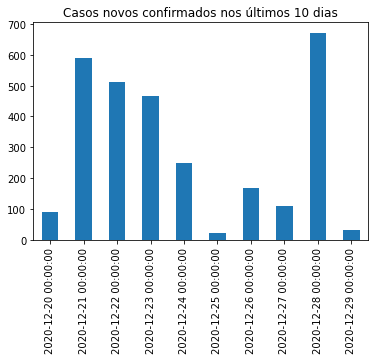

In [37]:
data['_dt_notificacao'].value_counts().sort_index()[-10:].plot.bar(title = 'Casos novos confirmados nos últimos 10 dias')

In [38]:
data['_dt_notificacao'].value_counts().sort_index()[-10:].mean()

290.5

#### Com o gráfico, verificamos a quantidade de novos casos, nos útimos 10 dias do DataSet, com uma média de 290 casos nesse intervalo.

# -----------------------------------------------------------------------------------------

## Atividade 2.2.4

<AxesSubplot:title={'center':'Casos recuperados nos últimos 10 dias'}>

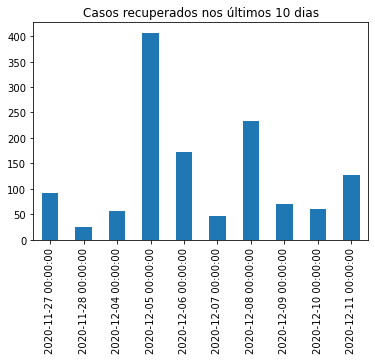

In [39]:
recuperados = data.loc[data['_conclusao']=='Recuperado']
recuperados['_dt_notificacao'].value_counts().sort_index()[-10:].plot.bar(title = 'Casos recuperados nos últimos 10 dias')

In [40]:
recuperados['_dt_notificacao'].value_counts().sort_index()[-10:].mean()

128.9

#### Com o gráfico, verificamos a quantidade dos ultimos casos recuperados, nos útimos 10 dias disponiveis no DataSet, com uma média de 129 recuperados nesse intervalo.

# ------------------------------------------------------------------------------------------------------

## Atividade 2.2.5
<h4> Construa um histograma que denote a quantidade percentual de casos por grupo etário, con-
siderando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.). </h4>

Para a averiguação do resultado do histograma será preenchida a coluna da faixa etária
com o resultado da função cut do pandas colocando como bins os valores que iniciam
os intervalos sugeridos, ignorando o membro a direita dos grupos.
> Ex: `[0,11]` irá colocar em um grupo `{0,1,2,3,4,5,6,7,8,9,10}`

In [97]:
bins = [0]
labels = []
max_age = 130

#conversão da coluna idade para tipo inteiro
data['_idade'] = data['_idade'].astype(int)
filtered_data = data[data['_idade'] <= max_age]
int_age = filtered_data['_idade']

#construção da lista de bins
for i in range(11,max_age,10):
        bins.append(i)

#construção da lista de labels a partir dos valores dos bins
for i in bins[:-1]:
    if i == 0:
        labels.append("{} a {} anos".format(i, i+10))
    else:
        labels.append("{} a {} anos".format(i, i+9))

#substituindo os valores da coluna existente de faixa etária pelos valores desejados
data['_faixa etária'] = pd.cut(int_age , bins=bins, labels=labels, right=False)

#agrupando os dados pelas faixas etárias semelhantes
age_range_group = data.groupby("_faixa etária")['_dt_notificacao'].count()

total_qtd = age_range_group.sum()
print("O total de registros é {}".format(total_qtd), end="\n\n")
print(age_range_group,end="\n\n")
for i in age_range_group:
    print("{} representa {:.2f} do total".format(i, i/total_qtd))

O total de registros é 79500

_faixa etária
0 a 10 anos        2551
11 a 20 anos       3873
21 a 30 anos      12231
31 a 40 anos      18917
41 a 50 anos      18200
51 a 60 anos      12310
61 a 70 anos       6808
71 a 80 anos       3114
81 a 90 anos       1219
91 a 100 anos       259
101 a 110 anos       11
111 a 120 anos        7
Name: _dt_notificacao, dtype: int64

2551 representa 0.03 do total
3873 representa 0.05 do total
12231 representa 0.15 do total
18917 representa 0.24 do total
18200 representa 0.23 do total
12310 representa 0.15 do total
6808 representa 0.09 do total
3114 representa 0.04 do total
1219 representa 0.02 do total
259 representa 0.00 do total
11 representa 0.00 do total
7 representa 0.00 do total


<h4>Aqui está a construção do histograma a partir da coluna de idade<h4>

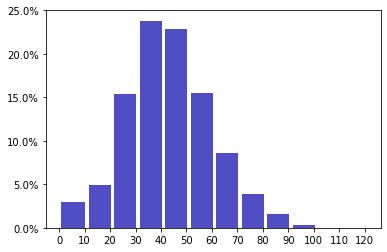

In [98]:
from matplotlib.ticker import PercentFormatter


plt.hist(int_age, bins=bins, color='#0504aa',alpha=0.7, rwidth=0.85, density=True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(0.1))
plt.xticks(np.arange(0, bins[-1], 10))
plt.yticks(np.arange(0,0.03,0.005))
plt.show()

## Atividade 2.2.6

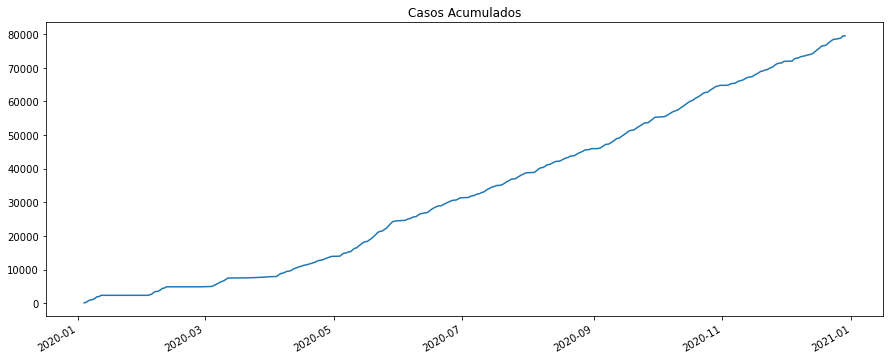

In [43]:
xxx = data['_dt_notificacao'].value_counts().sort_index().cumsum().plot(title = 'Casos Acumulados',figsize=(15,6))

#### Acumulado de casos confirmados

# ---------------------------------------------------------------------------------------

#### Atividade 2.2.7

Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado
para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível
observar alguma tendência?


Para essa questão será aproveitado o processamento feito na questão 5

_idade
38     2154
40     2106
39     2051
41     2038
37     2021
42     2016
43     1966
35     1948
44     1883
36     1867
45     1845
46     1816
34     1807
48     1699
32     1691
47     1689
49     1682
33     1671
31     1601
50     1566
51     1491
52     1439
29     1431
28     1403
53     1402
30     1381
27     1352
55     1316
26     1312
25     1285
54     1271
56     1225
24     1185
57     1167
58     1089
23     1062
59      971
22      961
60      939
61      879
21      859
63      796
62      794
20      789
64      730
0       708
65      687
66      684
67      650
19      590
69      553
70      521
68      514
71      450
18      435
72      435
17      398
73      348
16      341
75      337
1       333
15      326
74      322
76      296
14      284
77      262
13      255
12      232
78      229
11      223
80      218
79      217
2       210
10      197
7       175
82      174
81      172
5       170
3       165
4       159
9       157
83      154
84      1

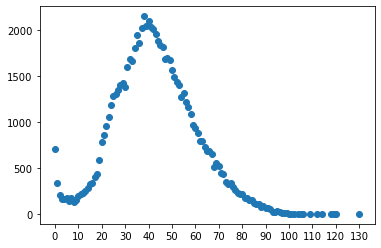

In [115]:
#Valores de idades únicas
ages = int_age.sort_values().unique()

#Agrupamento e contagem de quantitativo por idade
age_group_count = filtered_data.groupby("_idade")['_dt_notificacao'].count()
print("Quantidade de casos por idade")
print(age_group_count.sort_values(ascending=False).to_string())
plt.xticks(np.arange(0,ages[-1]+1,10))
plt.scatter(ages, age_group_count)

Foi observado que a faixa etária entre 30 e 60 anos é a que contém mais casos